## overview

In [1]:
# default package
import logging
import sys 
import os
import pathlib
import IPython
import random

In [2]:
# third party package
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from tqdm import tqdm
import scipy

In [3]:
# my package
sys.path.append(os.path.join(pathlib.Path().resolve(),"../"))

In [4]:
# reload settings
%load_ext autoreload
%autoreload 2

In [5]:
# logger
logger=logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

## ポアソン混合モデルからデータ生成

In [6]:
X1=np.random.poisson(lam=10,size=100)
X2=np.random.poisson(lam=20,size=100)
X=np.concatenate([X1,X2])

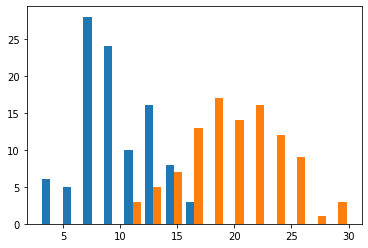

In [7]:
plt.hist([X1,X2],bins=15);

## ギブスサンプリング

In [8]:
def make_sum_one(x:np.array)->np.array:
    """配列の和を1にする"""
    return x/x.sum()

In [9]:
#setting
K=2
iter_num=1000

In [10]:
#初期値
eta=np.ones((len(X),K))
a_hat=np.array([0.1,1.1])
b_hat=np.array([0.1,1.1])
alpha_hat=np.ones(K)
#事前分布のパラメータ
a=1
b=1
alpha=np.ones(K)

In [11]:
def variational_inference(alpha_hat=alpha_hat):
    for i in tqdm(range(1,iter_num)):
        for n in range(len(X)):
            ln_lam_mean=scipy.special.psi(a_hat)-np.log(b_hat)
            lam_mean=a_hat/b_hat
            ln_pi_mean=scipy.special.psi(alpha_hat)-scipy.special.psi(alpha_hat.sum())
            eta[n,:]=make_sum_one(np.exp(X[n]*ln_lam_mean-lam_mean+ln_pi_mean))
        for k in range(K):
            a_hat[k]=(eta[:,k]*X).sum()+a
            b_hat[k]=(eta[:,k]).sum()+b
        alpha_hat=eta.sum(axis=0)+alpha
    return a_hat,b_hat

In [12]:
a_hat,b_hat=variational_inference()

100%|██████████| 999/999 [00:02<00:00, 371.47it/s]


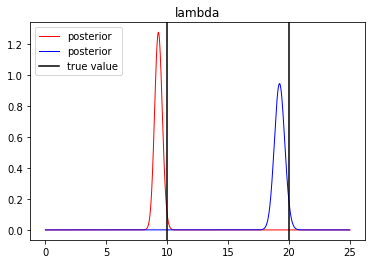

In [13]:
fig,ax=plt.subplots()
x = np.linspace(0,25,10000)
plt.plot(x,scipy.stats.gamma.pdf(x,a_hat[0],scale=1/b_hat[0]),'r-',lw=1,label="posterior")
plt.plot(x,scipy.stats.gamma.pdf(x,a_hat[1],scale=1/b_hat[1]),'b-',lw=1,label="posterior")
ax.axvline(20,color="black",label="true value")
ax.axvline(10,color="black")
ax.set_title("lambda")
ax.legend();